In [2]:
import numpy as np

In [3]:
sample_chol_levels = [66.0, 36.0, 73.0, 48.0, 81.0, 69.0, 75.0, 81.0, 73.0,
                      69.0, 101.0, 70.0, 50.0, 42.0, 36.0, 71.0, 65.0, 43.0, 76.0, 24.0]

In [4]:
x_bar = np.mean(sample_chol_levels)
s = np.std(sample_chol_levels, ddof = 1)
print(x_bar, s)

62.45 19.209304214912432


In [5]:
import scipy.stats as stats

In [6]:
stats.t.interval(alpha = 0.95,                              # Confidence level
                 df= len(sample_chol_levels)-1,             # Degrees of freedom
                 loc = x_bar,                               # Sample mean
                 scale = s)  

(22.244464209742247, 102.65553579025776)

In [7]:
sample_chol_levels = np.random.normal(loc=54, scale=17, size=1000)

In [8]:
x_bar = np.mean(sample_chol_levels)
s = np.std(sample_chol_levels, ddof = 1)
print('Sample mean:', x_bar)
print('Sample standard deviation:', s)

Sample mean: 54.216029093846345
Sample standard deviation: 17.195993144316596


In [9]:
#Min and Max of Confidence Interval
stats.t.interval(alpha = 0.95,                              # Confidence level
                 df= len(sample_chol_levels)-1,             # Degrees of freedom
                 loc = x_bar,                               # Sample mean
                 scale = s)    

(20.47161878138735, 87.96043940630534)

In [10]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

,0
count,20000.000000
mean,21.008578
std,3.671277
min,4.784588
25%,18.662256
50%,21.163276
75%,23.489438
max,36.140116


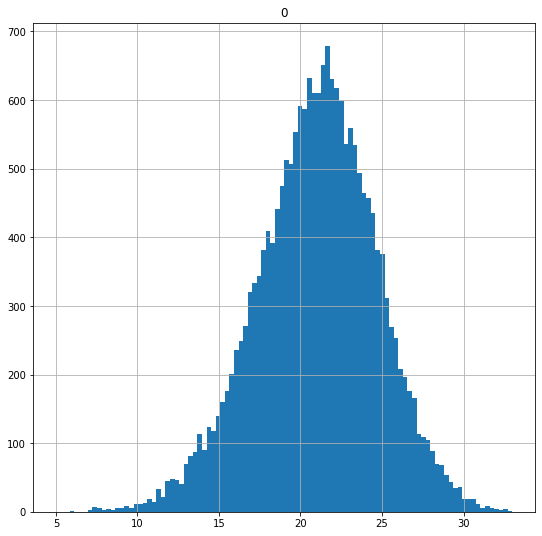

In [11]:
np.random.seed(20)
population_ages1 = np.random.normal(20, 4, 10000) 
population_ages2 = np.random.normal(22, 3, 10000) 
population_ages = np.concatenate((population_ages1, population_ages2))

pop_ages = pd.DataFrame(population_ages)
pop_ages.hist(bins=100,range=(5,33),figsize=(9,9))
pop_ages.describe()

In [12]:
np.random.seed(23)

sample_size = 25
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()
print ("Sample Mean:", sample_mean)
print ("Mean Difference:", population_ages.mean() - sample_mean)

Sample Mean: 19.870788629471857
Mean Difference: 1.1377888781920937


In [13]:
# Calculate the t-critical value for 95% confidence level for sample taken above. 
t_critical = stats.t.ppf(q = 0.975, df=sample_size-1)  # Get the t-critical value
print("t-critical value:")                  # Check the t-critical value
print(t_critical)  

t-critical value:
2.0638985616280205


In [14]:
# Calculate the sample standard deviation
sample_stdev = sample.std()    # Get the sample standard deviation

# Calculate sigma using the formula described above to get population standard deviation estimate
sigma = sample_stdev/math.sqrt(sample_size)  

# Calculate margin of error using t_critical and sigma
margin_of_error = t_critical * sigma

# Calculate the confidence intervals using calculated margin of error 
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  



print("Confidence interval:")
print(confidence_interval)

Confidence interval:
(18.4609156900928, 21.280661568850913)


In [15]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(18.4609156900928, 21.280661568850913)

In [16]:
# Function to take in sample data and calculate the confidence interval
def conf_interval(sample):
    '''
    Input:  sample 
    Output: Confidence interval
    '''
    n = len(sample)
    x_hat = sample.mean()
    # Calculate the z-critical value using stats.norm.ppf()
    # Note that we use stats.t.ppf with q = 0.975 to get the desired t-critical value 
    # instead of q = 0.95 because the distribution has two tails.

    t = stats.t.ppf(q = 0.975, df=24)  #  t-critical value for 95% confidence
    
    sigma = sample.std()/math.sqrt(sample_size) 

    # Calculate the margin of error using formula given above
    moe = t * sigma

    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = (x_hat - moe, x_hat + moe)
    
    return conf

In [17]:
# set random seed for reproducability
np.random.seed(12)

# Select the sample size 
sample_size = 25

# Initialize lists to store interval and mean values
intervals = []
sample_means = []

# Run a for loop for sampling 25 times and calculate + store confidence interval and sample mean values in lists initialised above

for sample in range(25):
    # Take a random sample of chosen size 
    sample = np.random.choice(a= population_ages, size = sample_size)
    
    # Calculate confidence_interval from function above
    confidence_interval = conf_interval(sample)    

    # Calculate the sample mean 
    sample_mean = sample.mean()
    
    # Calculate and append sample means and conf intervals for each iteration
    sample_means.append(sample_mean)
    intervals.append(confidence_interval)

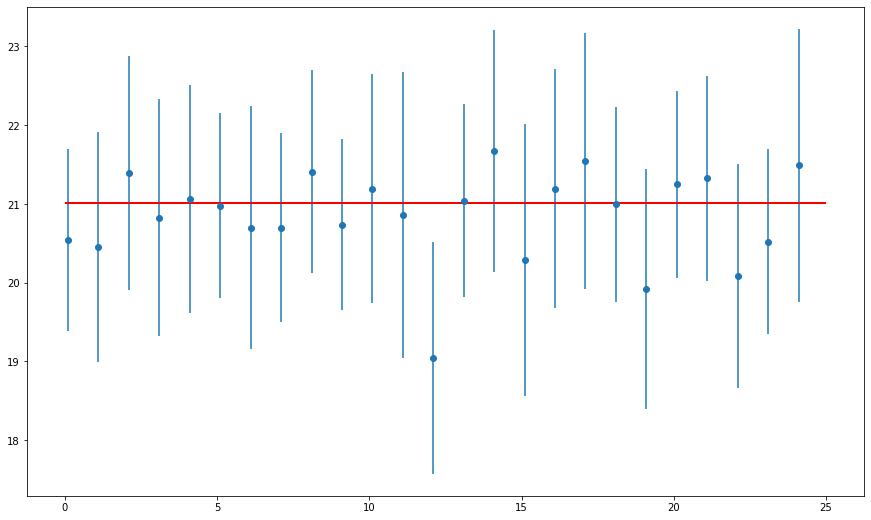

In [18]:
# Plot the confidence intervals with sample and population means
plt.figure(figsize=(15,9))

# Draw the mean and confidence interval for each sample
plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

# Draw the population mean 
plt.hlines(xmin=0, xmax=25,
           y=population_ages.mean(), 
           linewidth=2.0,
           color="red")
